<a href="https://colab.research.google.com/github/Aichalfakir/CSI4142_A1/blob/main/Copie_de_CSI_4142_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis


# INTRODUCTION



The purpose of this report is to present 10 key insights for each of the two datasets analyzed: car price and Mobile User Behavior. These insights were derived through exploratory data analysis and visualizations, using Python programming within this Jupyter Notebook.



*   **GOAL OF THE ANALYSIS**


1.   Car Price:


 The primary objective of this analysis is to uncover key factors influencing car prices by exploring and analyzing the relationships between various attributes such as brand, model, production year, engine size, mileage, fuel type, transmission type, and owner count.

2.   Mobile User Behavior Dataset:

This dataset provides insights into user behavior in mobile applications. The goal is to analyze patterns and preferences, which can help businesses enhance user engagement, optimize app design, and improve customer satisfaction.

*   **AUDIENCE**

This report is intended for the following audiences:

**Car Dealership Managers**:

To optimize pricing strategies and inventory management based on market trends and consumer preferences.

**Data scientists and analysts**:
To identify behavioral patterns and build predictive models from the mobile user behavior dataset.

**Technology companies and mobile app developers**:

To understand user needs and optimize user experience (UX) in mobile applications.

**Automobile Manufacturers:**

 To understand how vehicle features and specifications influence pricing and enhance future product design.

 **Individual Consumers:** To assist buyers and sellers in making informed decisions about pricing and value assessment for vehicles.



# DATASETS IMPORTS AND LOADING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url1 = "https://raw.githubusercontent.com/exaucee2/CSI4142_A1/main/car_price_dataset.csv"
dataset_car_price = pd.read_csv(url1)

url2 = "https://raw.githubusercontent.com/exaucee2/CSI4142_A1/main/user_behavior_dataset.csv"
dataset_user_behavior = pd.read_csv(url2)

print("Dataset 1: car price")
print(dataset_car_price.info())
print(dataset_car_price.head())
print(dataset_car_price.describe())

print("\nDataset 2: Mobile User Behavior")
print(dataset_user_behavior.info())
print(dataset_user_behavior.head())
print(dataset_user_behavior.describe())

Dataset 1: car price
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diese

# MISSING VALUES

In [ ]:
def display_missing_values(df, dataset_name):
    print(f"\nOutput for {dataset_name}:")

    def display_statistics(missing, label):
        if (missing > 0).any():
            print(f"{label}:\n{missing[missing > 0]}")
        else:
            print(f"No {label.lower()} found")

    # Empty strings
    missing_empty = (df == '').sum()
    display_statistics(missing_empty, "Empty Strings")

    # '?' as a missing value
    missing_question_mark = (df == '?').sum()
    display_statistics(missing_question_mark, "Question Mark Values ('?')")

    # NaN values
    missing_NaN = df.isnull().sum()
    display_statistics(missing_NaN, "NaN Values")


datasets = [
    (dataset_car_price, 'car price Dataset'),
    (dataset_user_behavior, 'Mobile User Behavior Dataset')
]

for data, name in datasets:
    display_missing_values(data, name)


Output for car price Dataset:
No empty strings found
No question mark values ('?') found
No nan values found

Output for Mobile User Behavior Dataset:
No empty strings found
No question mark values ('?') found
No nan values found


# REDUNDANCY

In [ ]:
def check_duplicate_rows(df, dataset_name):
    duplicate_rows = df[df.duplicated()]
    if not duplicate_rows.empty:
       print(f"{dataset_name}: {len(duplicate_rows)} duplicate rows found.")
       print("Duplicate rows:")
       print(duplicate_rows)
    else:
       print(f"{dataset_name}: No duplicate rows found.")
check_duplicate_rows(dataset_car_price, "car price")
check_duplicate_rows(dataset_user_behavior, "Mobile User Behavior Dataset")


car price: No duplicate rows found.
Mobile User Behavior Dataset: No duplicate rows found.


In [ ]:
def check_duplicate_columns(df, dataset_name):
    duplicated_columns = df.T.duplicated().sum()
    if duplicated_columns > 0:
        print(f"{dataset_name}: {duplicated_columns} duplicate columns found.")
    else:
        print(f"{dataset_name}: No duplicate columns found.")

check_duplicate_columns(dataset_car_price, "car price")
check_duplicate_columns(dataset_user_behavior, "Mobile User Behavior Dataset")


car price: No duplicate columns found.
Mobile User Behavior Dataset: No duplicate columns found.


# DATASETS DESCRIPTIONS

DATASET 1:


*   **NAME**: car price
*   **AUTHOR**: Asinow
*   **PURPOSE**: The purpose of the Car Price Prediction Dataset is to develop a model that can predict the price of a car based on various features. These features include the car's brand, model, production year, engine size, fuel type, transmission type, mileage, number of doors, and previous owners.
*   **SHAPE:** this dataset contains 10000 rows dans 10 columns
*   **LIST OF FEATURES**:


| Column Name      |      Description        |         Data Type    |
|-------------------------|---------------------------|--------------|
|Brand| The brand of the car (e.g., Toyota, BMW, Ford)  | Categorical (Nominal)
|Model | the specific model of the car| Categorical (Nominal)
|Year |the production year of the car|Numerical (Discrete)
|Engine_Size | the engine size in liters(L)|Numerical (Continuous)
|Fuel-type|The type of fuel the car uses|Categorical (Nominal)
|transmission |The type of transmission (Manual, Automatic, Semi-Automatic)|Categorical (Nominal)
|mileage | The total distance traveled by the car in kilometers|Numerical (Continuous)
|doors| The number of doors the car has|Numerical (Discrete)
|owner_count|The number of previous owners the car has had|Numerical (Discrete)
|price |The estimated selling price of the car|Numerical (Continuous)




*   **MISSING VALUES**: There are no missing values detected in the dataset (no empty strings, question marks, or NaN values).

*   **REDUNDANCY** :No duplicate rows or columns were found in the dataset, indicating that all features are unique and do not contain redundancy.



####  Dataset 2:
- **Name**: Mobile Device Usage and User Behavior Dataset.
- **Author**: Vala khorasani
- **PURPOSE**: The dataset analyzes user behavior in mobile applications by examining screen time, app usage, and battery consumption, aiming to provide insights for businesses, app developers, and data analysts to improve app performance and user experience.
-  **Shape:** this dataset contains 700 rows, 11 columns.
- **List of features** :

| Column Name           | Description       | Data Type        |
|-------------------------|-------------------------------------------------------------|---------------------------|
| User_ID                | Unique identifier for each user.                            | Numerical (Discrete)    |
| Device_Model          | Model of the user's smartphone.                        | Categorical (Nominal)          |
|Operating_System      | The OS of the device (iOS or Android).                      | Categorical (Nominal)              |
|App_Usage_Time         | Daily time spent on mobile applications (minutes).          | Numerical  (Discrete)      |
|Screen_On_Time        | Average hours per day the screen is active.                 | Numerical (Continuous)                |
| Battery_Drain          | Daily battery consumption in milliamp-hours (mAh).          | Numerical  (Discrete)   |
| Number_of_Apps_Installed | Total number of apps installed on the device.              | Numerical  (Discrete)               |
| Data_Usage             | Daily mobile data consumption in megabytes (MB).            | Numerical (Discrete)  |
| Age            | Age of the user.    | Numerical (Discrete)    |
|Gender    | Gender of the user (Male/Female).   | Categorical (Nominal) |
|User_Behavior_Class     | Classification of user behavior (1 to 5, based on usage patterns). | Categorical (Ordinal)    |

- **MISSING VALUES**: There are no missing values detected in the dataset (no empty strings, question marks, or NaN values).
-**REDUNDANCY** : No duplicate rows or columns were found in the dataset, indicating that all features are unique and do not contain redundancy.


#  Data preparation and transformation
**3.1 Conversion des unités**



In [ ]:
dataset_user_behavior['App Usage Time (hours/day)'] = dataset_user_behavior['App Usage Time (min/day)'] / 60


# ANALYSIS DESCRIPTION

# DATASET 1:

# 1. Distribution of Car Prices

**insight:** Normal distribution with a slight positive skew
Median price around $9,000,
Few  vehicles above $16,000,
High concentration between $6,000 and $12,000

**Supporting Evidence**: A histogram of car prices showing the distribution

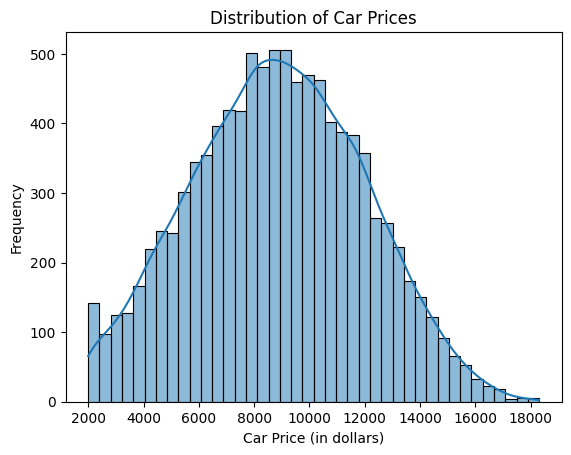

In [ ]:
#plots a histogram of car prices with a kernel density estimate curve
sns.histplot(dataset_car_price['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Car Price (in dollars)')
plt.ylabel('Frequency')
plt.show()



 **type of Analysis**: (r1) Univariate numerical analysis using a histogram to visualize the spread of car prices.

# 2. Frequency of Car Brands

**insight:**Ford is the most represented brand
Closely followed by toyota
Mercedes has the lowest representation
Relatively balanced distribution across brands

**Supporting Evidence:** A countplot showing the frequency of different car brands.

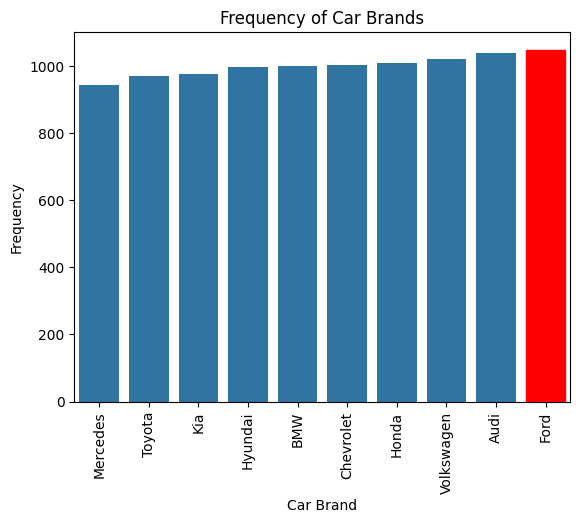

In [ ]:
#creates a count plot showing the frequency of each car brand

#get brand counts sorted from lowest to highest
brand_order=data=dataset_car_price['Brand'].value_counts(ascending=True).index
#create the count plot with sorted brand
ax=sns.countplot(x='Brand',data=dataset_car_price,order=brand_order)
#get frequency counts
brand_counts=dataset_car_price['Brand'].value_counts(ascending=True)
#find the brand with highest count
max_counts=brand_counts.max()
max_brand=brand_counts.idxmax()
#change the color of the highest frequency bar
for p,label in zip(ax.patches,brand_counts.index):
  if label==max_brand:
    p.set_color('red')

plt.title('Frequency of Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

**type of Analysis**: (r2) Univariate categorical analysis using a countplot to visualize the distribution of car brands.

# 3. Car Brands Grouped by Fuel Type

**insight:** German brands (BMW, Audi) have a strong presence in electric vehicles,
Toyota and Honda show a high proportion of hybrids,
Ford maintains a balance between different fuel types

**Supporting Evidence**: A grouped countplot comparing car brands by fuel type.

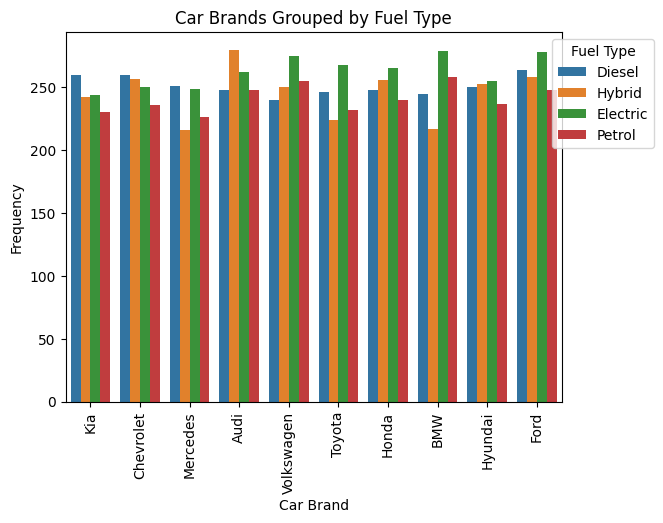

In [ ]:
#create a count plat showing the frequency of each car brand,grouped by fuel type
sns.countplot(x='Brand', hue='Fuel_Type', data=dataset_car_price)
plt.title('Car Brands Grouped by Fuel Type')
plt.legend(title='Fuel Type',loc='upper right',bbox_to_anchor=(1.2,1))
plt.xlabel('Car Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


**type of analysis:** (r3) Grouped categorical analysis using a countplot to explore car brands and their fuel types.

#4. Transmission Types Across Engine Size Groups

**Insight:**the manual, hybrid and automatic transmissions of the large group are more dominant than those of the medium and small groups

**Supporting Evidence:** A grouped countplot of transmission types, where engine size is grouped into categories (e.g., small, medium, large).

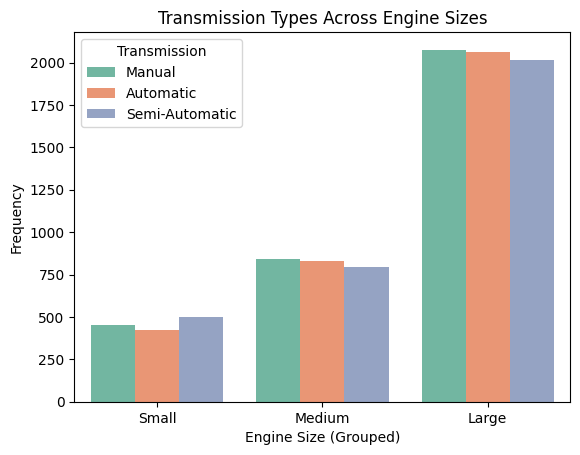

In [ ]:
# Define the bin edges for categorizing engine sizes
bins = [0, 1.5, 2.5, 5]
# Define the corresponding labels for each bin
labels = ['Small', 'Medium', 'Large']
# Create a new column in the dataset that categorizes 'Engine_Size' into bins
dataset_car_price['Engine_Size_Group'] = pd.cut(dataset_car_price['Engine_Size'], bins=bins, labels=labels)
# Create a count plot showing the distribution of transmission types across engine size groups
sns.countplot(x='Engine_Size_Group', hue='Transmission', data=dataset_car_price, palette='Set2')
plt.title('Transmission Types Across Engine Sizes')
plt.xlabel('Engine Size (Grouped)')
plt.ylabel('Frequency')
plt.show()


**type of analysis:**   (r3) In this grouped countplot, the Engine_Size is categorized into three groups: small, medium, and large, and we compare the distribution of transmission types within each engine size group.

#5. Comparing Transmission Types between Petrol and Diesel Cars

**Insight:** Balanced distribution between manual and automatic across all fuel types,
Electric vehicles show a slight preference for automatic transmissions,
Petrol vehicles show the smallest difference between manual and automatic

**Supporting Evidence**: A countplot comparing transmission types between petrol and diesel cars.

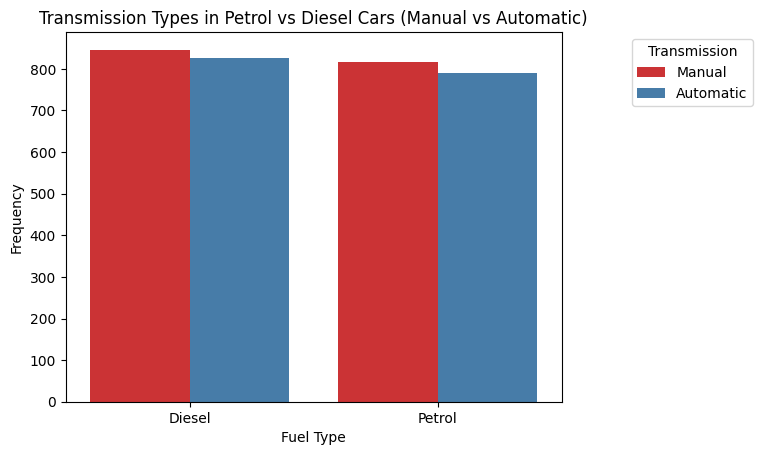

In [ ]:
# Filter the dataset to include only rows where the 'Transmission' column is either 'Manual' or 'Automatic'
# and the 'Fuel_Type' column is either 'Petrol' or 'Diesel'
filtered_data = dataset_car_price[
    dataset_car_price['Transmission'].isin(['Manual', 'Automatic']) &
    dataset_car_price['Fuel_Type'].isin(['Petrol', 'Diesel'])
]

# Create a countplot to visualize the distribution of 'Fuel_Type' with 'Transmission' as the hue (legend) to separate the data by transmission type
sns.countplot(x='Fuel_Type', hue='Transmission', data=filtered_data, palette='Set1')

plt.title('Transmission Types in Petrol vs Diesel Cars (Manual vs Automatic)')
plt.legend(title='Transmission', loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()


**type of Analysis:** (r4) Categorical/Categorical analysis comparing transmission types (automatic vs manual) between petrol and diesel cars.

#6. Comparing Transmission Types Across Different Car Brands (Ordered by Frequency)

**Insight:** Relatively balanced distribution between manual, automatic, and semi-automatic
Some brands like Ford and Audi have a higher proportion of manual transmissions
Mercedes shows a preference for automatic transmissions

**Supporting Evidence:** A grouped countplot comparing transmission types across multiple car brands, ordered by the frequency of each brand.

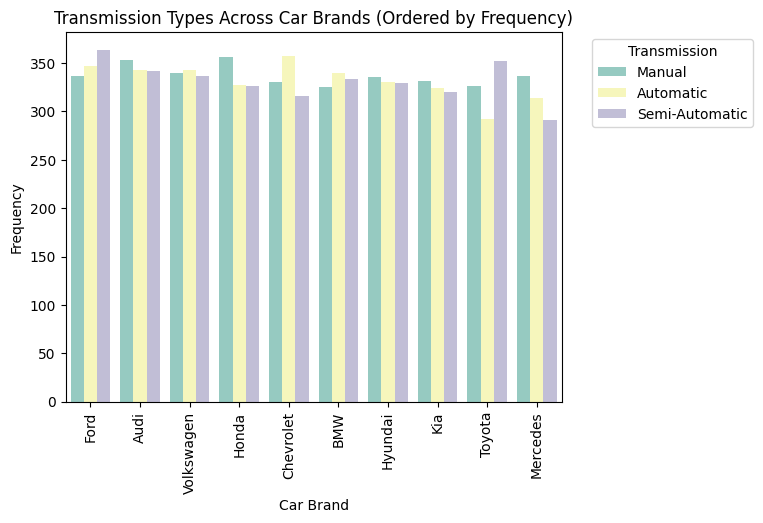

In [ ]:
# Get the list of car brands ordered by their frequency in the dataset (from most frequent to least frequent)
brand_order = dataset_car_price['Brand'].value_counts().index
# Create a countplot to visualize the distribution of car brands, with 'Transmission' as the hue (legend),
# showing different transmission types for each car brand. The brands are ordered by frequency in the dataset.
sns.countplot(x='Brand', hue='Transmission', data=dataset_car_price, order=brand_order, palette='Set3')
plt.title('Transmission Types Across Car Brands (Ordered by Frequency)')
plt.legend(title='Transmission',loc='upper right',bbox_to_anchor=(1.4,1))
plt.xlabel('Car Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


**type of Analysis:** (r5) Categorical/Categorical analysis comparing transmission types (manual vs automatic) across multiple car brands, with the x-axis ordered by the frequency of car brands in the dataset.

# 7. Car Price vs. Fuel Type

**Insight:** Electric vehicles have the highest median price
Followed by hybrids,
Diesel and petrol vehicles have lower median prices,
Electric vehicles show less price variation

**Supporting Evidence:** A boxplot comparing car prices across different fuel types.

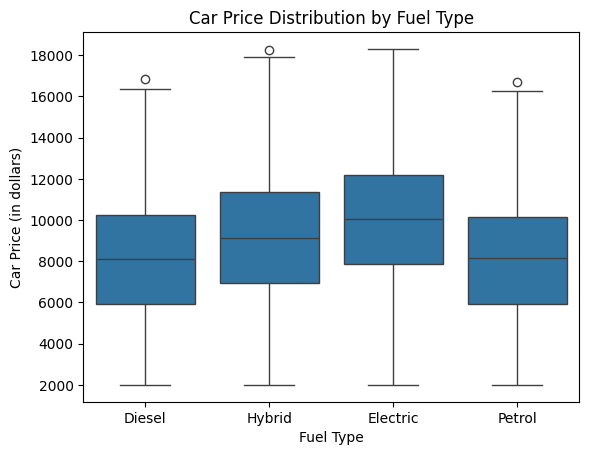

In [ ]:
# Create a box plot to visualize the distribution of car prices ('Price') for each fuel type ('Fuel_Type')
sns.boxplot(x='Fuel_Type', y='Price', data=dataset_car_price)
plt.title('Car Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Car Price (in dollars)')
plt.show()


**type of Analysis:** (r7) Numerical categorical analysis using a boxplot to explore car price distributions by fuel type.

#8. Mileage Impact on Price

**Insight:** Clear negative correlation: higher mileage means lower prices,
Depreciation appears steeper in the first 100,000 km,
Large price dispersion for low-mileage vehicles

**Supporting Evidence:** A scatterplot showing the relationship between car mileage and price.


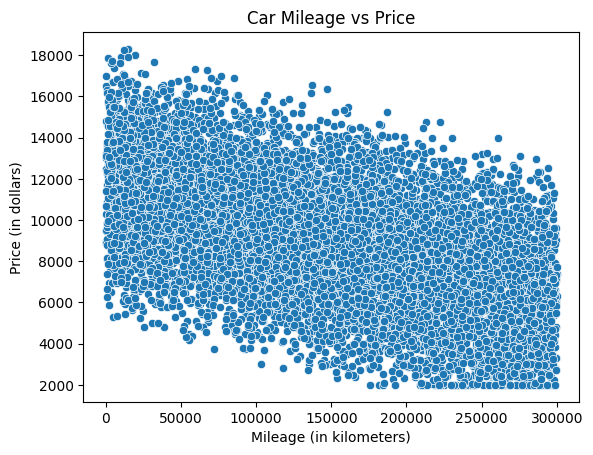

In [ ]:
# Create a scatter plot to visualize the relationship between car mileage ('Mileage') and car price ('Price')
sns.scatterplot(x='Mileage', y='Price', data=dataset_car_price)
plt.title('Car Mileage vs Price')
plt.xlabel('Mileage (in kilometers)')
plt.ylabel('Price (in dollars)')
plt.show()


**type of Analysis**: (r6) Bivariate numerical analysis to visualize how car mileage affects the price.

#9. Correlation between Engine Size and Price

**Insight:** Shows a general positive correlation: larger engines tend to be more expensive,
Price dispersion increases with engine size, suggesting more price variability in larger engines,
Prices generally range from $2,000 to $18,000

**Supporting Evidence:** A scatterplot highlighting the correlation between engine size and car price.

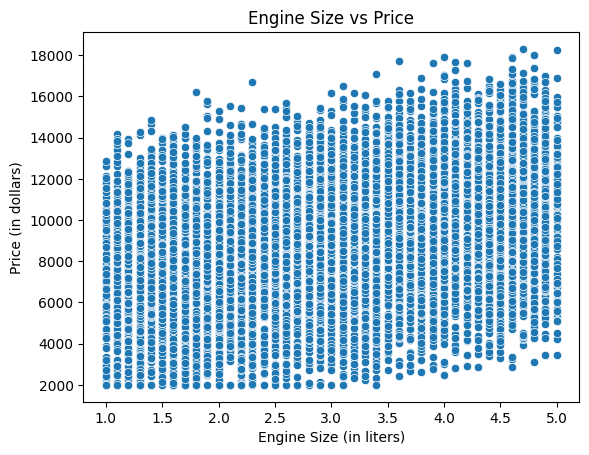

In [ ]:
# Create a scatter plot to visualize the relationship between engine size ('Engine_Size') and car price ('Price')
sns.scatterplot(x='Engine_Size', y='Price', data=dataset_car_price)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size (in liters)')
plt.ylabel('Price (in dollars)')
plt.show()


**type of Analysis:** (r6) Bivariate numerical analysis using a scatterplot to highlight the correlation between engine size and car price.


#10. Distribution of Engine Sizes in the Car Dataset

**Insight:** Most engines range between 1.0L and 5.0L,
Notable peaks around 2.5L, 3.5L, and 4.0L,
The distribution is relatively uniform with a slight tendency toward medium-sized engines

**Supporting Evidence:** A histogram showing the distribution of engine sizes across the dataset.

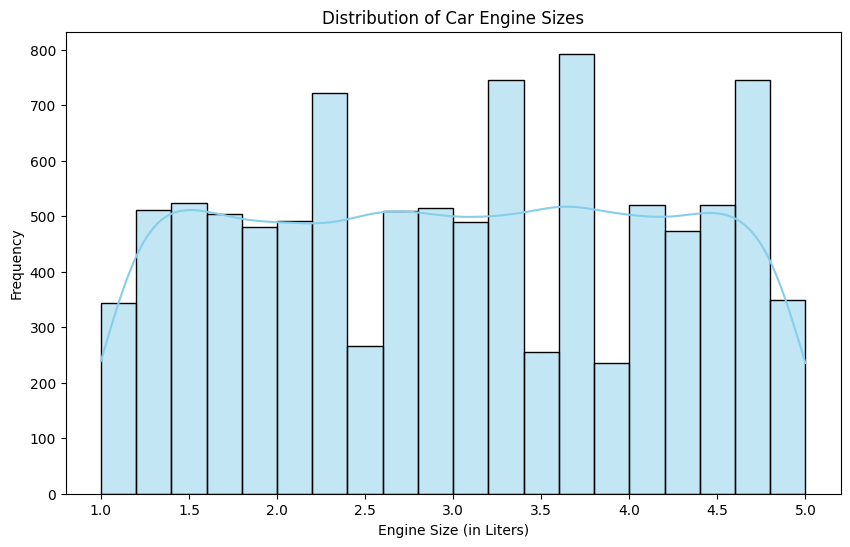

In [ ]:
# Set the size of the figure (plot dimensions) to 10 inches by 6 inches
plt.figure(figsize=(10, 6))
# Create a histogram with 20 bins to visualize the distribution of car engine sizes ('Engine_Size'),
# including a Kernel Density Estimate (KDE) curve to show the distribution shape.
# The color of the histogram bars is set to 'skyblue'.
sns.histplot(dataset_car_price['Engine_Size'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Car Engine Sizes')
plt.xlabel('Engine Size (in Liters)')
plt.ylabel('Frequency')
plt.show()


**type of analysis:**(r1) This histogram visualizes the dispersion of engine sizes in the dataset, showing how the values are spread out across different car models.

###*DATASET 2:*
#####***1. Identify the most popular models among users.***

> **Insight 1:** The user distribution is evenly distributed among the five smartphone models, with the iPhone 12 and Xiaomi Mi 11 models showing a slight preference. The distribution of users by smartphone model is depicted using a countplot.

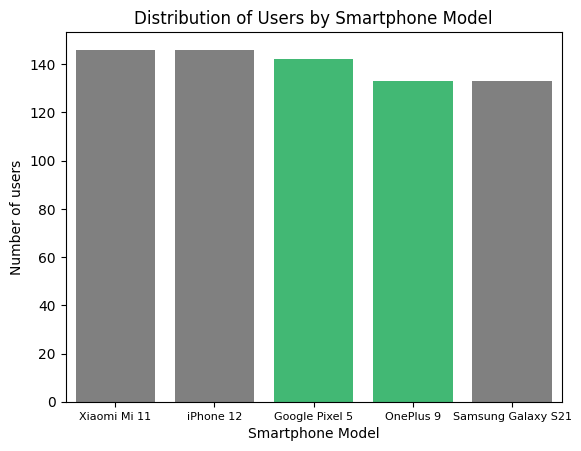

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Trier les modèles de smartphone par fréquence d'utilisation
device_order = dataset_user_behavior['Device Model'].value_counts().index
# Définir une palette de couleurs personnalisée pour mettre en évidence les deux modèles les plus utilisés
colors = ['#2ecc71' if model in device_order[:2] else 'gray' for model in device_order]
# Création du countplot
sns.countplot(x='Device Model', data=dataset_user_behavior,order=device_order,palette=colors, hue='Device Model', legend=False)
# Ajout du titre et des labels
plt.title('Distribution of Users by Smartphone Model')
plt.xlabel('Smartphone Model')
plt.ylabel('Number of users')

#Ajustement de la taille de la police des étiquettes
plt.xticks(fontsize=8)
# Affichage du graphique
plt.show()

- Type of analysis performed: Univariate analysis Categorical data (r2)

#####***2. Comparison of App Usage Time by Gender***

> **Insight 2:** Male and female users have a similar distribution of app usage, although the median for male users is slightly higher.We use a boxplot to compare the distribution of app usage duration by gender.

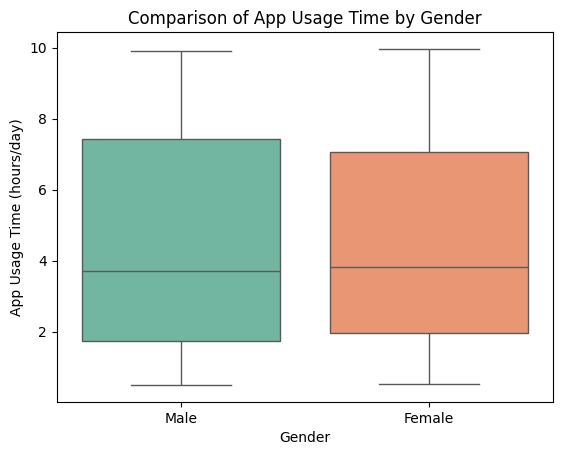

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Création d'un boxplot
sns.boxplot(x='Gender', y='App Usage Time (hours/day)', data=dataset_user_behavior, palette='Set2', hue='Gender',legend=False)
# Ajout d'un titre explicatif au graphique
plt.title('Comparison of App Usage Time by Gender')
# Ajout d'étiquettes aux axes
plt.xlabel('Gender')
plt.ylabel('App Usage Time (hours/day)')

plt.show()


- Type of analysis performed: Bivariate analysis r7: Comparison of a numeric variable (App Usage Time (hours/day)) with a categorical variable (Gender).

#####***3. Distribution of users by operating system based on data consumption.***
>**Insight 3:** The data consumption of Android and iOS users is comparable, with close medians and distributions, but slightly higher values for Android users.



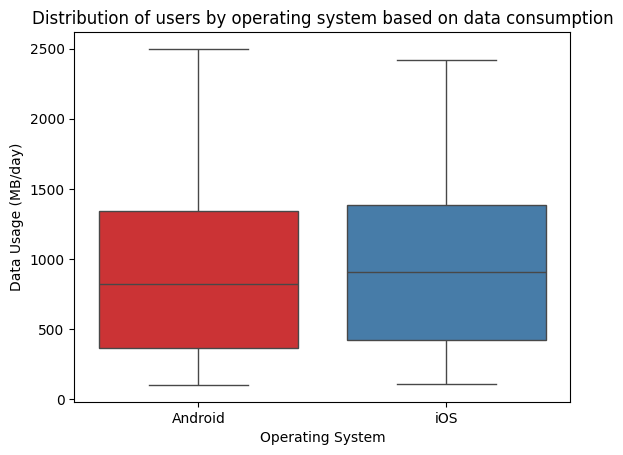

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un boxplot pour analyser la consommation de données selon le système d'exploitation
sns.boxplot(x='Operating System', y='Data Usage (MB/day)', data=dataset_user_behavior,palette="Set1",legend=False,hue='Operating System')

plt.title('Distribution of users by operating system based on data consumption')
plt.xlabel('Operating System')
plt.ylabel('Data Usage (MB/day)')
plt.show()


- Type of analysis performed: Bivariate analysis(r7)

#####**4. Analyze the relationship between Screen On Time and Battery Drain**
>**Insight 3:** Increased screen time leads to a proportional increase in battery consumption.

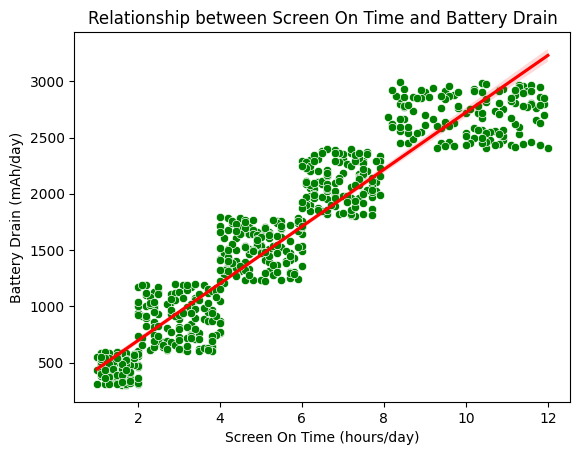

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Création d'un scatter plot pour visualiser la relation entre le temps d'écran et la consommation de batterie
sns.scatterplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', data=dataset_user_behavior,color='green')
# Ajout d'une régression linéaire pour montrer la tendance générale
sns.regplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', data=dataset_user_behavior, scatter=False, color='red')

plt.title('Relationship between Screen On Time and Battery Drain')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

- Type of analysis performed: Bivariate analysis (r6): Study of the correlation between two numerical variables (Screen On Time and Battery Drain)

#####**5. Daily Data Usage**
>**Insight 5:** Most users consume less than 1000 MB of data per day

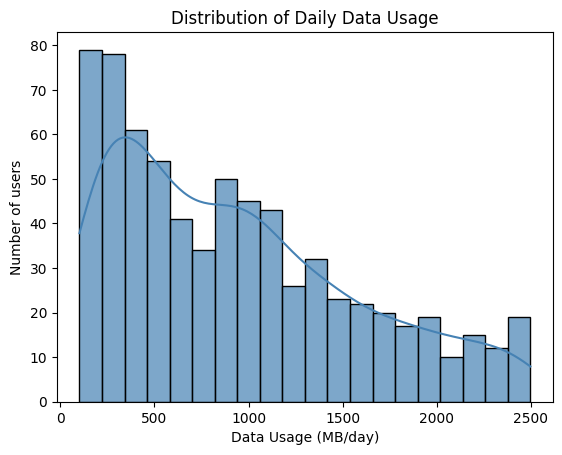

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un histogramme pour représenter la distribution de la consommation de données
sns.histplot(
    dataset_user_behavior['Data Usage (MB/day)'],  # Données à analyser
    bins=20,  # Nombre de classes pour l'histogramme
    kde=True,  # Ajout de la courbe de densité pour une meilleure visualisation
    color='steelblue',  # Choix d'une couleur harmonieuse
    edgecolor='black',  # Bordures des barres pour améliorer la lisibilité
    alpha=0.7  # Transparence des barres pour éviter l'effet de saturation
)
plt.title('Distribution of Daily Data Usage')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Number of users')

plt.show()


Les barres les plus élevées montrent un pic autour de 250-500 MB, indiquant que ce niveau de consommation est le plus courant.
- Type of analysis performed:Univariate analysis(r1)

#####**6. Analyze the relationship between Data Usage and App Usage Time**
>**Insight 6:** Users who spend more time on apps tend to consume more mobile data, but some have optimized usage with low data consumption despite high usage time.

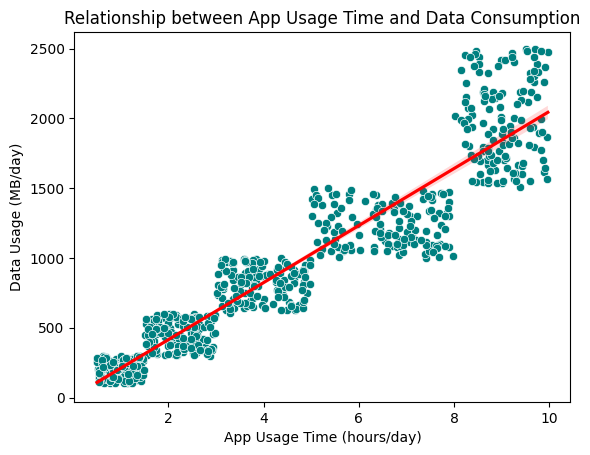

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Création d'un nuage de points pour visualiser la relation entre les deux variables
sns.scatterplot(x='App Usage Time (hours/day)', y='Data Usage (MB/day)',data=dataset_user_behavior, color='teal')

# Ajout d'une droite de régression pour observer la tendance globale
sns.regplot(x='App Usage Time (hours/day)', y='Data Usage (MB/day)',data=dataset_user_behavior, scatter=False, color='red')

plt.title('Relationship between App Usage Time and Data Consumption')
plt.xlabel('App Usage Time (hours/day)')
plt.ylabel('Data Usage (MB/day)')

plt.show()


- Type of analysis performed: Bivariate analysis (r6):Comparison between two numeric variables (App Usage Time and Data Usage)

#####**7. Distribution of users by behavior class**
>**Insight 7:** The second class is the most commonly exhibited user behavior.


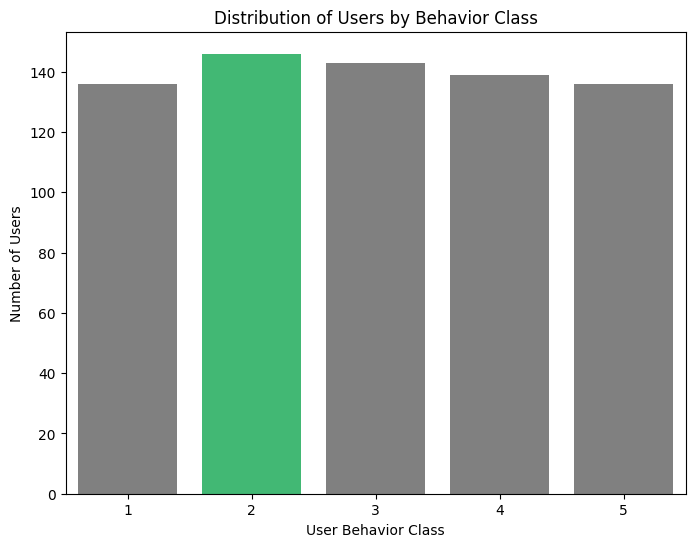

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définition de la palette de couleurs avec mise en évidence d'une classe spécifique
color_palette = ['gray','#2ecc71', 'gray','gray', 'gray']

# Définition de la taille de la figure pour un affichage optimal
plt.figure(figsize=(8, 6))
# Création du countplot pour afficher la répartition des utilisateurs par classe de comportement
sns.countplot(x='User Behavior Class', data=dataset_user_behavior, palette=color_palette,hue='User Behavior Class',legend=False)

plt.title('Distribution of Users by Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Number of Users')

plt.show()

- Type of analysis performed:Univariate analysis(r2)

#####***8. Distribution of Operating System by Age Group***
>The majority of older users (41-60 years) use Android compared to younger users (0-25 years), with iOS users having a higher proportion, despite Android dominating in all age groups.

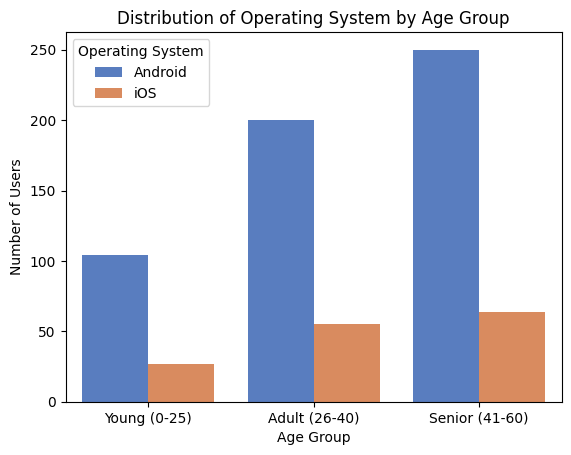

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Définir des tranches d'âge
bins = [0, 25, 40, 60]  # Tranches d'âge
# Étiquettes correspondantes aux intervalles
labels = ['Young (0-25)', 'Adult (26-40)', 'Senior (41-60)']

# Création d'une nouvelle colonne 'Age Group' dans le dataset en fonction des tranches définies
dataset_user_behavior['Age Group'] = pd.cut(dataset_user_behavior['Age'], bins=bins, labels=labels)

# Countplot groupé par groupe d'âge et système d'exploitation
sns.countplot(x='Age Group', hue='Operating System', data=dataset_user_behavior, palette='muted')

plt.title('Distribution of Operating System by Age Group')

# Ajout d'étiquettes aux axes
plt.xlabel('Age Group')
plt.ylabel('Number of Users')

plt.legend(title='Operating System')
plt.show()


- Type of analysis performed:Univariate analysis(r3).

The study categorized users into three age groups: Youth (0-25 years), Adults (26-40 years), and Seniors (41-60 years) to analyze usage trends of mobile operating systems. The pd.cut() function from pandas library was used to segment age values into predefined intervals, facilitating comparison of preferences across different age groups.

#####***9. Distribution of Smartphone Models by User Behavior Class***
>Users in behavior class 3 prefer the OnePlus 9 and Xiaomi Mi 11 models over other models.

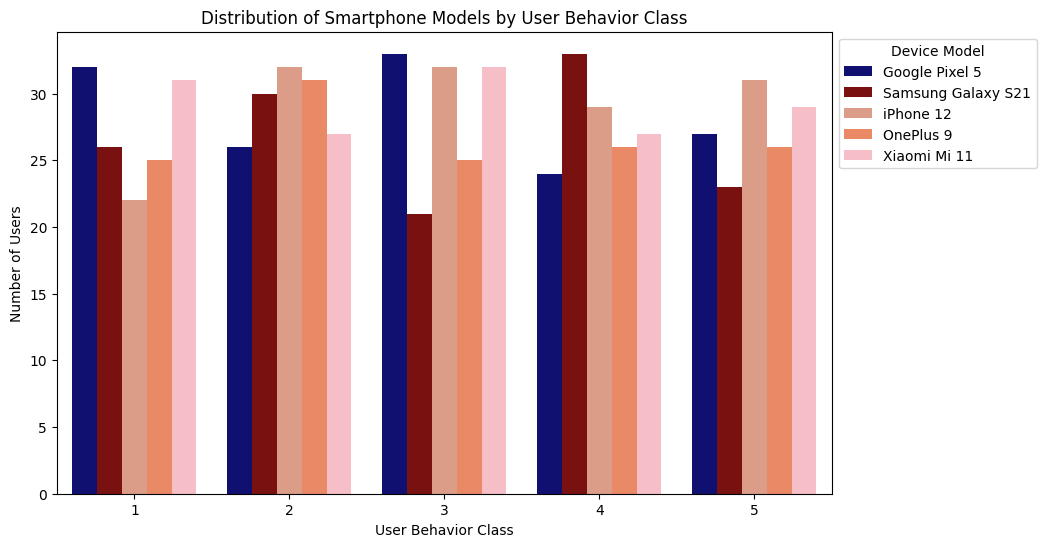

In [ ]:
# Définition d'une palette de couleurs personnalisée pour device model
palette_colors = ['navy', 'darkred', 'darksalmon', 'coral', 'lightpink']

# Création du countplot
sns.countplot(x='User Behavior Class', hue='Device Model',
              data=dataset_user_behavior, palette=palette_colors)

# légende
plt.legend(title='Device Model', loc='upper left', bbox_to_anchor=(1, 1))

# Ajouter les titres et labels
plt.title('Distribution of Smartphone Models by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Number of Users')

# Rotation des étiquettes pour meilleure lisibilité
plt.xticks(rotation=0)

# Affichage du graphique final
plt.show()

- Type of analysis performed: Bivariate analysis (r5)

#####***10. Comparison of Operating System Usage by Gender***
>Android is the preferred operating system by both genders, with a significant proportion preferring it over iOS.

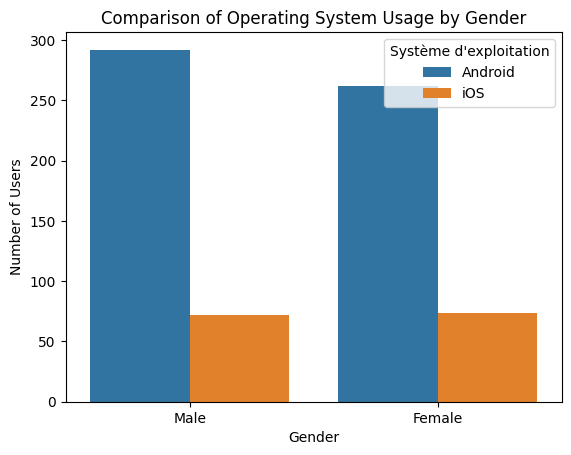

In [ ]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'un graphique de comparaison de l'utilisation des systèmes d'exploitation selon le genre
sns.countplot(x='Gender', hue='Operating System', data=dataset_user_behavior, palette=['#1f77b4', '#ff7f0e'])

# Ajout d'un titre clair et informatif au graphique
plt.title('Comparison of Operating System Usage by Gender')

# Étiquetage des axes
plt.xlabel('Gender')
plt.ylabel('Number of Users')

# Ajout d'une légende pour clarifier les couleurs utilisées
plt.legend(title="Système d'exploitation", loc="upper right")

plt.show()


- Type of analysis performed: Bivariate analysis (r4)

# CONCLUSION
**1. car price dataset**

 The car_price dataset reveals a complex and evolving automotive market, with clear price-performance relationships. Displacement distribution is balanced between 1.0 and 5.0 liters, with more powerful engines being more expensive. There is a strong negative correlation between mileage and vehicle price, indicating significant depreciation, particularly over the first 100,000 kilometers. Electric vehicles are still selling at a premium, followed by hybrids, while traditional fuel types (petrol and diesel) remain more affordable. The transmission market shows a remarkable balance between manual and automatic options for most brands and fuel types, although electric vehicles are tending towards automatic transmissions. German manufacturers (BMW, Audi) are the first to offer electric vehicles, while Japanese brands (Toyota, Honda) dominate the hybrid segment. Ford has the strongest market presence, with a balanced portfolio of fuel types. The overall price distribution is around $9,000, with few vehicles exceeding $16,000.

**2. Mobile Device Usage and User Behavior Dataset**

- The study reveals significant trends in smartphone usage influenced by factors like age, gender, device model, and operating system, providing valuable insights:
 - Operating System Preferences: Android dominates the market due to factors like device diversity, affordability, and system flexibility, making it the most preferred operating system across all age groups and genders.
 - Correlation between app usage and data consumption: The study found a significant correlation between app usage time and data consumption, suggesting that users who spend more time on their smartphones consume the most mobile data.
 - Distribution of smartphone models by user behavior class: No significant dominance of any particular model was observed.
 - Impact of age and gender on usage habits: The data indicates that younger users frequently use apps, with minimal gender differences, suggesting similar usage habits between men and women.

 In conclusion, this study provides valuable insights into smartphone usage and lays the groundwork for further analysis to enhance user experience and enhance the services provided on these platforms.

# REFERENCES
- GeeksforGeeks. (2025, 20 janvier). Data Analysis with Python. GeeksforGeeks. https://www.geeksforgeeks.org/data-analysis-with-python/

- Histogram with Boxplot above in Python. (n.d.). Stack Overflow. https://stackoverflow.com/questions/33381330/histogram-with-boxplot-above-in-python

- Anderson, B. (2023, September 1). Le guide ultime : comment lire des fichiers CSV avec Pandas. Statorials. https://statorials.org/pandas-lire-csv/

- scikit-learn Exemple : imputation de valeurs manquantes avant de construire un estimateur Français. (n.d.). https://runebook.dev/fr/docs/scikit_learn/auto_examples/impute/plot_missing_values

- SourceTrail, P. (2023, September 11). Résolu : obtenir le nombre de valeurs manquantes dans les pandas. SourceTrail. https://www.sourcetrail.com/fr/python/pandas/obtenir-le-nombre-de-valeurs-manquantes

- GeeksforGeeks. (2024, November 21). Pandas read CSV in Python. GeeksforGeeks. https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/